# Table of contents

1. Loading CFID-3D dataset from figshare 
2. Making pandas dataframe
3. Properties available, keys
4. Preparing training and target data
5. Simple regression traiing on 500 samples for formation energies
6. Visualizing training results

In [1]:
# !pip install jarvis-tools, and restart runtime in the notebook if you haven't installed it yet
from jarvis.db.figshare import data
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

cfid_3d = data('cfid_3d')

In [2]:
len(cfid_3d)

35984

In [3]:
typical_data_ranges = {'formation_energy_peratom': [-5, 5], 'optb88vdw_bandgap': [0, 10], 'mbj_bandgap': [0, 10], 'bulk_modulus_kv': [0, 250], 'shear_modulus_gv': [0, 250], 'epsx': [0, 60], 'epsy': [0, 60], 'epsz': [0, 60], 'mepsx': [0, 60], 'mepsy': [0, 60], 'mepsz': [0, 60], 'n-Seebeck': [-600, 10], 'n-powerfact': [0, 5000], 'p-Seebeck': [-10, 600], 'p-powerfact': [0, 5000], 'slme': [0, 40], 'spillage': [0, 4], 'encut': [0, 2000], 'kpoint_length_unit': [0, 200], 'dfpt_piezo_max_dielectric': [0, 100], 'dfpt_piezo_max_dij': [0, 3000], 'dfpt_piezo_max_eij': [0, 10], 'ehull': [0, 1], 'electron_avg_effective_masses_300K': [0, 3], 'hole_avg_effective_masses_300K': [0, 3], 'exfoliation_energy': [0, 1000], 'magmom_oszicar': [0, 10], 'max_ir_mode': [0, 4000], 'total_energy_per_atom': [-10, 3]}

In [4]:
typical_data_ranges

{'formation_energy_peratom': [-5, 5],
 'optb88vdw_bandgap': [0, 10],
 'mbj_bandgap': [0, 10],
 'bulk_modulus_kv': [0, 250],
 'shear_modulus_gv': [0, 250],
 'epsx': [0, 60],
 'epsy': [0, 60],
 'epsz': [0, 60],
 'mepsx': [0, 60],
 'mepsy': [0, 60],
 'mepsz': [0, 60],
 'n-Seebeck': [-600, 10],
 'n-powerfact': [0, 5000],
 'p-Seebeck': [-10, 600],
 'p-powerfact': [0, 5000],
 'slme': [0, 40],
 'spillage': [0, 4],
 'encut': [0, 2000],
 'kpoint_length_unit': [0, 200],
 'dfpt_piezo_max_dielectric': [0, 100],
 'dfpt_piezo_max_dij': [0, 3000],
 'dfpt_piezo_max_eij': [0, 10],
 'ehull': [0, 1],
 'electron_avg_effective_masses_300K': [0, 3],
 'hole_avg_effective_masses_300K': [0, 3],
 'exfoliation_energy': [0, 1000],
 'magmom_oszicar': [0, 10],
 'max_ir_mode': [0, 4000],
 'total_energy_per_atom': [-10, 3]}

In [5]:
df=pd.DataFrame(cfid_3d)

In [6]:
df.columns

Index(['bulk_modulus_kv', 'desc', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_eij', 'ehull',
       'electron_avg_effective_masses_300K', 'encut', 'epsx', 'epsy', 'epsz',
       'exfoliation_energy', 'formation_energy_peratom',
       'hole_avg_effective_masses_300K', 'jid', 'kpoint_length_unit',
       'magmom_oszicar', 'max_ir_mode', 'mbj_bandgap', 'mepsx', 'mepsy',
       'mepsz', 'n-Seebeck', 'n-powerfact', 'optb88vdw_bandgap', 'p-Seebeck',
       'p-powerfact', 'shear_modulus_gv', 'slme', 'spillage',
       'total_energy_per_atom'],
      dtype='object')

In [7]:
def get_ml_data(dataframe='', ml_property='formation_energy_peratom'):   
    x = []
    y = []
    jid = []
    df2 = dataframe[['desc','jid',ml_property]].replace('na',np.nan).dropna()
    for ii,i in df2.iterrows():
        if len(i['desc']) ==1557 and float(i[ml_property])!=float('inf') and i[ml_property]!='na' \
            and float(i[ml_property])<typical_data_ranges[ml_property][1] \
            and float(i[ml_property])>typical_data_ranges[ml_property][0] :
            x.append(i['desc'])
            y.append(i[ml_property])
            jid.append(i['jid'])
    return np.array(x,dtype='float'),np.array(y,dtype='float'),jid

In [8]:
ml_property= 'formation_energy_peratom' #'bulk_modulus_kv'
x, y, jids = get_ml_data(dataframe=df, ml_property='formation_energy_peratom')

In [9]:
# 90 %-10 % train-test split
X_train, X_test, y_train, y_test,jid_train,jid_test = train_test_split(x, y,jids, random_state=1, test_size=0.1)
print (len(X_train), len(X_test))

32296 3589


In [10]:
#Let's take 500 samples only for a quick training
# For more accurate models, higher number of points and hyper-parameter optimization etc. is needed
X1=X_train[0:500]
Y1=y_train[0:500]
X2=X_test[0:500]
Y2=y_test[0:500]
print (X1.shape)

(500, 1557)


In [11]:
# GB regressor with default parameters
model = GradientBoostingRegressor()
model.fit(X1,Y1)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
# predict on 10% held set which was not used during training
pred=model.predict(X2)

In [13]:
def regr_scores(pred, test):

    """
   Generic regresion scores
   Args:
       pred: predicted values
       test: held data for testing
   Returns:
        info: with metrics
   """

    rmse = np.sqrt(mean_squared_error(test, pred))
    r2 = r2_score(test, pred)
    mae = mean_absolute_error(test, pred)
    info = {}
    info["mae"] = mae
    info["rmse"] = rmse
    info["r2"] = r2
    info["test"] = test
    info["pred"] = pred
    return info

Text(0, 0.5, 'ML-Formation energy (eV/atom)')

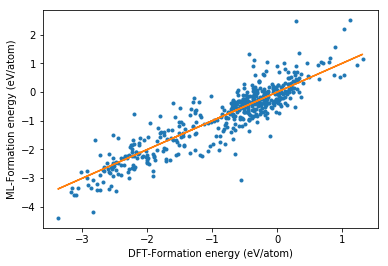

In [14]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
reg_sc=regr_scores(Y2,pred)
plt.plot(reg_sc['test'],reg_sc['pred'],'.')
plt.plot(reg_sc['test'],reg_sc['test'])
plt.xlabel('DFT-Formation energy (eV/atom)')
plt.ylabel('ML-Formation energy (eV/atom)')

In [15]:
reg_sc

{'mae': 0.3407225884803926,
 'rmse': 0.46997166648820593,
 'r2': 0.7581418789907807,
 'test': array([-6.21140205e-01, -1.16951424e+00, -3.10015388e+00, -4.44967897e-01,
        -4.71510457e-01, -5.35180414e-01, -5.70782329e-01,  3.82176398e-02,
        -9.78633862e-02, -5.31983188e-01, -5.42295204e-01, -5.17288549e-01,
         1.03717452e+00, -6.80499334e-01, -1.79124270e+00, -8.62304797e-01,
        -1.68962501e+00,  3.33029684e-01,  9.66850362e-01, -1.47476114e+00,
        -2.72705379e+00, -2.26704779e+00, -5.04835158e-01, -4.87813501e-01,
        -4.27108231e-01, -2.24109143e+00, -6.15376766e-01, -3.36241058e-02,
        -4.98118890e-01,  8.68600956e-02, -2.68113503e-01, -1.80481089e-01,
        -2.28539813e+00, -1.27330719e+00, -3.87192758e-02, -1.87363803e-01,
        -2.13449546e+00,  1.13431989e-01, -2.59247603e+00, -2.41019144e+00,
        -6.82841322e-01, -4.56391228e-01, -2.11074503e+00, -2.59213767e+00,
        -7.05424669e-02, -1.97207043e+00, -1.46426183e-01, -2.34797959e